# Fastai Introduction

In this first notebook, we will install the fastai package into the planetary computer environment.<br>
If that works, it will be possible to train a visual CNN model directly on the planetary. Let's check.

<b>Note:</b> If using VSCode remotely, open the command palette (Crtl+Shift+P) and select "Jupiter: Specify jupyter server for connection" and enter the following key:<br>

`https://pccompute.westeurope.cloudapp.azure.com/compute/user/mauricio@ana.gov.br/?token=5767ade9e44c4b14923b1233fe9fd559`

At the bottom it should appear Jupyter Server: Remote

## Installing Fastai

<b>With GPU:</b> To install fastai library we will use `mamba`

In [1]:
# !mamba install -q -y -c fastchan fastai 

<b>No GPU:</b> To install it in CPU mode, we will need to first install Pytorch, then fastai from the source code

In [1]:
# Install pytorch following instructions from:
# https://pytorch.org/get-started/locally/
%pip install --quiet torch torchvision --extra-index-url https://download.pytorch.org/whl/cpu

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Then install fastai from code
!cd /tmp; git clone https://github.com/fastai/fastai -q

In [1]:
%pip -q install -e /tmp/fastai

Note: you may need to restart the kernel to use updated packages.


## Checking Installation

We will check fastai version and download the PETs dataset

In [ ]:
import fastai
from fastai.vision.all import *

fastai.__version__

'2.7.10'

## Testing Cats vs Dogs

In [5]:
untar_data??

Signature:
untar_data(
    url: 'str',
    archive: 'Path' = None,
    data: 'Path' = None,
    c_key: 'str' = 'data',
    force_download: 'bool' = False,
    base: 'str' = '~/.fastai',
) -> 'Path'
Source:   
def untar_data(
    url:str, # File to download
    archive:Path=None, # Optional override for `Config`'s `archive` key
    data:Path=None, # Optional override for `Config`'s `data` key
    c_key:str='data', # Key in `Config` where to extract file
    force_download:bool=False, # Setting to `True` will overwrite any existing copy of data
    base:str='~/.fastai' # Directory containing config file and base of relative paths
) -> Path: # Path to extracted file(s)
    "Download `url` using `FastDownload.get`"
    d = FastDownload(fastai_cfg(), module=fastai.data, archive=archive, data=data, base=base)
    return d.get(url, force=force_download, extract_key=c_key)
File:      /tmp/fastai/fastai/data/external.py
Type:      function


In [6]:
path = untar_data(URLs.PETS, archive='/tmp')

In [7]:
path

Path('/home/jovyan/.fastai/data/oxford-iiit-pet')

In [8]:
path.ls()

(#2) [Path('/home/jovyan/.fastai/data/oxford-iiit-pet/images'),Path('/home/jovyan/.fastai/data/oxford-iiit-pet/annotations')]

In [9]:
files = get_image_files(path/"images")
len(files)

7390

## Cats vs Dogs

In [10]:
files[0],files[-60]

(Path('/home/jovyan/.fastai/data/oxford-iiit-pet/images/japanese_chin_48.jpg'),
 Path('/home/jovyan/.fastai/data/oxford-iiit-pet/images/Sphynx_76.jpg'))

In [11]:
def label_func(f): return f[0].isupper()

In [12]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

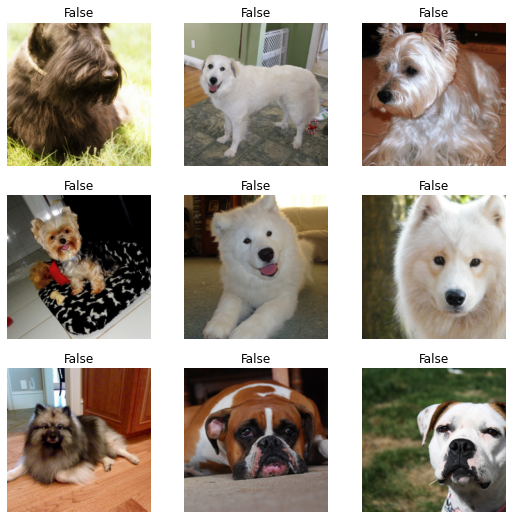

In [13]:
dls.show_batch()

In [14]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

/srv/conda/envs/notebook/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.151802,0.026745,0.008119,10:54


epoch,train_loss,valid_loss,error_rate,time
0,0.059173,0.051805,0.015562,16:14
1,0.030878,0.020101,0.006766,14:54
2,0.015005,0.015960,0.004736,14:50


In [25]:
learn.predict(files[0])

('False', TensorBase(0), TensorBase([9.9999e-01, 5.5974e-06]))

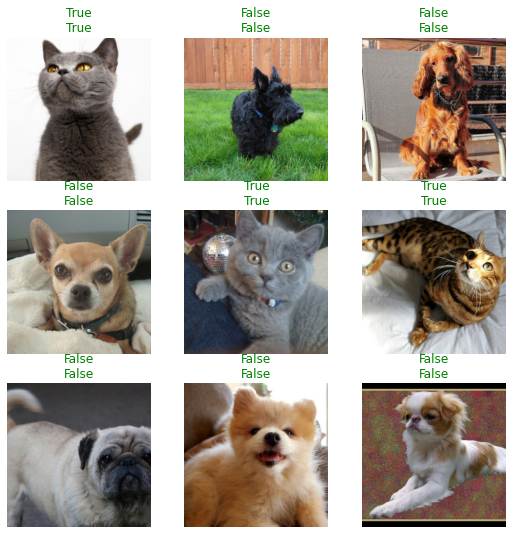

In [28]:
learn.show_results()

## Clean Files

In [35]:
!rm -r {path.as_posix()}

In [38]:
!rm ~/.fastai/archive/*

In [39]:
!df -H

Filesystem      Size  Used Avail Use% Mounted on
overlay         134G   49G   85G  37% /
tmpfs            68M     0   68M   0% /dev
tmpfs            15G     0   15G   0% /sys/fs/cgroup
/dev/sdc         16G  5.1G   11G  33% /home/jovyan
/dev/sda1       134G   49G   85G  37% /etc/hosts
tmpfs            26G  4.1k   26G   1% /dev/shm
tmpfs            15G   13k   15G   1% /proc/driver/nvidia
udev             15G     0   15G   0% /dev/nvidia0
tmpfs            15G     0   15G   0% /proc/acpi
tmpfs            15G     0   15G   0% /proc/scsi
tmpfs            15G     0   15G   0% /sys/firmware
